# Pandas as a toolbox

In [5]:
import pandas as pd
import pandasql as ps
import numpy as np
import seaborn as sns

In [6]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Who pay more tips, Male or Female?

## Using SQL

In [5]:
sql = "select sex, avg(tip) from tips where sex = 'Female'"
df = ps.sqldf(sql)
df

,sex,avg(tip)
0,Female,2.833448


In [6]:
sql = "select sex, count(*), avg(tip) from tips group by sex"
print(ps.sqldf(sql))

      sex  count(*)  avg(tip)
0  Female        87  2.833448
1    Male       157  3.089618


## Answer same questions using Pandas syntax

In [7]:
print(tips['tip'].mean())

2.9982786885245902


In [8]:
tips['sex'] == 'Female'

0       True
1      False
2      False
3      False
4       True
5      False
6      False
7      False
8      False
9      False
10     False
11      True
12     False
13     False
14      True
15     False
16      True
17     False
18      True
19     False
20     False
21      True
22      True
23     False
24     False
25     False
26     False
27     False
28     False
29      True
       ...  
214     True
215     True
216    False
217    False
218    False
219     True
220    False
221     True
222    False
223     True
224    False
225     True
226     True
227    False
228    False
229     True
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238     True
239    False
240     True
241    False
242    False
243     True
Name: sex, Length: 244, dtype: bool

In [9]:
print(tips[tips['sex'] == 'Female'] ['tip'].mean())

2.833448275862069


In [10]:
print(tips[tips['sex'] == 'Male'] ['tip'].mean())

3.0896178343949052


## Who pay more tips, Smoker or Non-Smoker?

In [11]:
sql = "select smoker, count(*), avg(tip) from tips group by smoker"
print(ps.sqldf(sql))

  smoker  count(*)  avg(tip)
0     No       151  2.991854
1    Yes        93  3.008710


In [12]:
print(tips.groupby(['smoker']).count())
tips.groupby(['smoker']).mean()

        total_bill  tip  sex  day  time  size
smoker                                       
Yes             93   93   93   93    93    93
No             151  151  151  151   151   151


,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


## When will people tend to pay more Tips, Dinner or Lunch?

In [13]:
sql = "select time, count(*), avg(tip) from tips group by time"
print(ps.sqldf(sql))

     time  count(*)  avg(tip)
0  Dinner       176  3.102670
1   Lunch        68  2.728088


In [14]:
tips.groupby(['time']).mean()

,total_bill,tip,size
time,,,
Lunch,17.168676,2.728088,2.411765
Dinner,20.797159,3.102670,2.630682


## Group By using Pandas with more than one attributes

In [15]:
tips.groupby(['sex','smoker','time']).mean()

total_bill       tip      size
sex    smoker time                                  
Male   Yes    Lunch    17.374615  2.790769  2.153846
              Dinner   23.642553  3.123191  2.595745
       No     Lunch    18.486500  2.941500  2.500000
              Dinner   20.130130  3.158052  2.766234
Female Yes    Lunch    17.431000  2.891000  2.300000
              Dinner   18.215652  2.949130  2.217391
       No     Lunch    15.902400  2.459600  2.520000
              Dinner   20.004138  3.044138  2.655172

In [16]:
tips.groupby(['sex'])['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [17]:
## Simple plots using Pandas

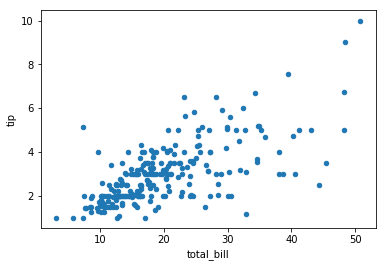

In [18]:
tips.plot.scatter(x='total_bill', y='tip')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000177D5B0CF28>,
      dtype=object)

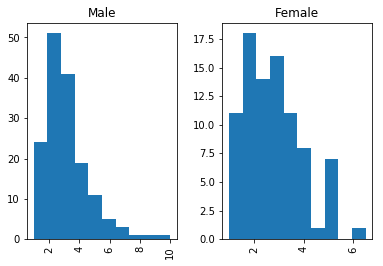

In [19]:
tips['tip'].hist(by=tips['sex'])

## Correlation

In [20]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


# What is the average tips as percent of the total bill?

## First we need to calculate an extra "Percent" column

In [21]:
tips['percent'] = tips['tip'] /tips['total_bill']

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percent
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [23]:
tips.percent.mean()

0.16080258172250478

In [24]:
tips.groupby(['sex'])['percent'].mean()

sex
Male      0.157651
Female    0.166491
Name: percent, dtype: float64

## Female tips more generously while they pay less in absolute dollars amount in tip. Why?

## Would it be because Male spend more in dinner or lunch? Let's check

In [25]:
tips.groupby(['sex'])['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

## So one has to be careful what questions you are asking!!!  Answer can be different

## Need an Analytical Mind, not just calculating some numbers or running a library

## Missing Data and Outliers

## Load a similar dataset

In [26]:
tips2 = pd.read_csv('tips2.csv')
tips2['percent'] = tips2['tip'] /tips2['total_bill']

In [27]:
tips2.groupby(['sex'])['tip'].mean()

sex
Female    3.206897
Male      3.082722
Name: tip, dtype: float64

In [28]:

tips2.groupby(['sex'])['percent'].mean()

sex
Female    0.181678
Male      0.157651
Name: percent, dtype: float64

## This dataset has Female paying higher tip both in absolute dollar amount as well as in percentage

## But let's check for null and outliers

In [29]:
tips2.isnull().any()

total_bill     True
tip           False
sex           False
smoker        False
day           False
time          False
size          False
percent        True
dtype: bool

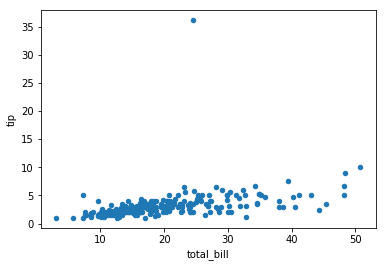

In [30]:
tips2.plot.scatter(x='total_bill', y='tip')

In [31]:
tips2.tip.describe()

count    245.000000
mean       3.126816
std        2.526508
min        1.000000
25%        2.000000
50%        2.880000
75%        3.550000
max       36.100000
Name: tip, dtype: float64

## Remove outliers and Null

In [32]:
print(tips2.shape)
tips2.dropna(inplace=True)
print(tips2.shape)

(245, 8)
(244, 8)


In [33]:
tips2[ tips2.percent > 0.6]

,total_bill,tip,sex,smoker,day,time,size,percent
4,24.59,36.10,Female,No,Sun,Dinner,4,1.468076
173,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [34]:
tips2 = tips2[tips2.percent < 0.8]
tips2.shape

(243, 8)

## Now Female pay a lower amount of tip

In [35]:
tips2.groupby(['sex'])['tip'].mean()

sex
Female    2.824419
Male      3.089618
Name: tip, dtype: float64

In [36]:
tips2.groupby(['sex'])['percent'].mean()

sex
Female    0.166720
Male      0.157651
Name: percent, dtype: float64